In [323]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [324]:
rumah123_df = pd.read_csv('../../data/rumah123_cleaned.csv')
rumah123_df.head()

,price,name,location,bedroom,bathroom,land_area,building_area
0,1680.0,Rumah Baru Gress Daerah Merr Dan Jalan Kembar ...,"Rungkut, Surabaya",3,3,67,120
1,950.0,Jual Rumah 2 Lantai Medokan Ayu Utara,"Medokan Ayu, Surabaya",3,3,72,140
2,500.0,Rumah Dekat Merr 500juta Di Wonorejo Rungkut,"Wonorejo, Surabaya",2,1,30,36
3,950.0,Cluster Baru Mewah Dekat Merr Oerr Dan Kampus,"Sukolilo, Surabaya",2,2,50,55
4,600.0,Perumahan Murah Kebraon Surabaya Selatan,"Kebraon, Surabaya",2,1,50,56


## EDA

In [325]:
rumah123_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25935 entries, 0 to 25934
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          25935 non-null  float64
 1   name           25934 non-null  object 
 2   location       25935 non-null  object 
 3   bedroom        25935 non-null  int64  
 4   bathroom       25935 non-null  int64  
 5   land_area      25935 non-null  int64  
 6   building_area  25935 non-null  int64  
dtypes: float64(1), int64(4), object(2)
memory usage: 1.4+ MB


In [326]:
rumah123_df.drop(columns=['name'], inplace=True)

In [327]:
rumah123_df.describe().T

,count,mean,std,min,25%,50%,75%,max
price,25935.0,1324.602121,469.962390,200.0,935.0,1400.0,1700.0,2000.0
bedroom,25935.0,3.042954,1.362558,1.0,2.0,3.0,3.0,120.0
bathroom,25935.0,2.132794,1.817041,1.0,1.0,2.0,3.0,240.0
land_area,25935.0,135.321496,4471.976477,15.0,75.0,96.0,120.0,720000.0
building_area,25935.0,138.455870,3107.450150,15.0,78.0,110.0,147.0,500000.0


### Cek Missing value

In [328]:
rumah123_df.isnull().sum()

price            0
location         0
bedroom          0
bathroom         0
land_area        0
building_area    0
dtype: int64

In [329]:
rumah123_df.dropna(inplace=True)

In [330]:
rumah123_df.isin(['', '-', ' ', '   ', 0]).sum()

price            0
location         0
bedroom          0
bathroom         0
land_area        0
building_area    0
dtype: int64

### Cek Duplicate

In [331]:
rumah123_df.duplicated().sum()

9650

In [332]:
rumah123_df.drop_duplicates(inplace=True)
rumah123_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16285 entries, 0 to 25933
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          16285 non-null  float64
 1   location       16285 non-null  object 
 2   bedroom        16285 non-null  int64  
 3   bathroom       16285 non-null  int64  
 4   land_area      16285 non-null  int64  
 5   building_area  16285 non-null  int64  
dtypes: float64(1), int64(4), object(1)
memory usage: 890.6+ KB


#### Cek Multikolinieritas

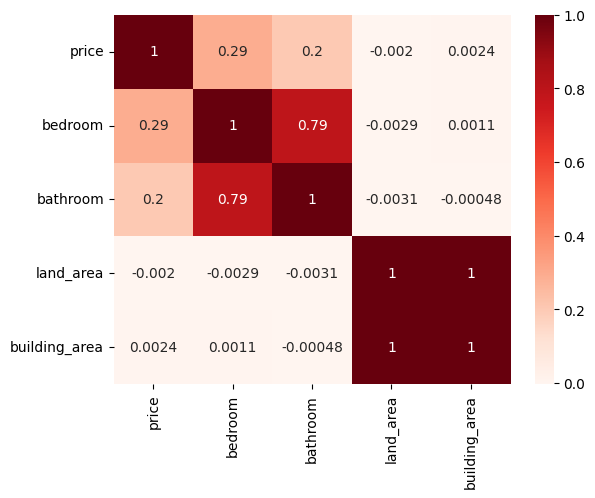

In [333]:
numerical_cols = rumah123_df.select_dtypes(include=['number'])

sns.heatmap(numerical_cols.corr(), annot=True, cmap=plt.cm.Reds)
plt.show()

### Plot Distribusi

In [334]:
def check_plot(df, variable):
    # fungsi mengambil kerangka data (df) dan
    # variabel yang diminati sebagai argumen

    print(variable)
    # tentukan ukuran gambar
    plt.figure(figsize=(16, 4))

    # histogram
    plt.subplot(1, 3, 1)
    sns.histplot(df[variable], bins=30)
    plt.title('Histogram')

    # plot Q-Q
    plt.subplot(1, 3, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)
    plt.ylabel('Variable quantiles')

    # box plot
    plt.subplot(1, 3, 3)
    sns.boxplot(y=df[variable])
    plt.title('Boxplot')

    plt.show()

price


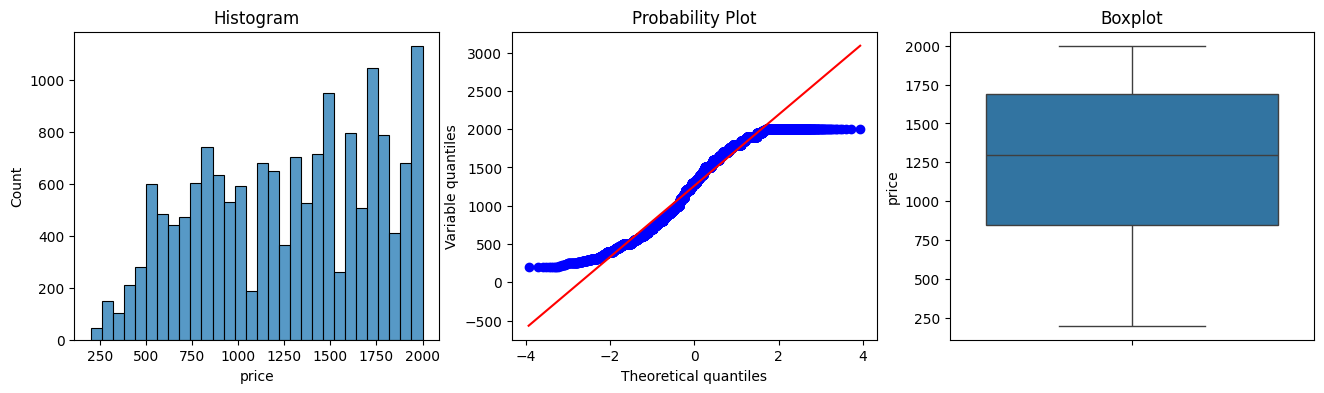

bedroom


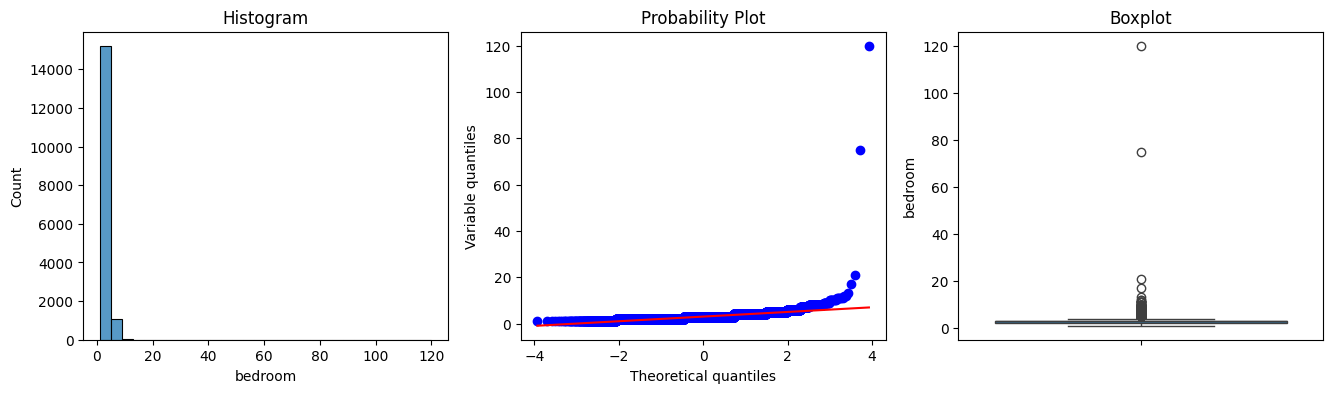

bathroom


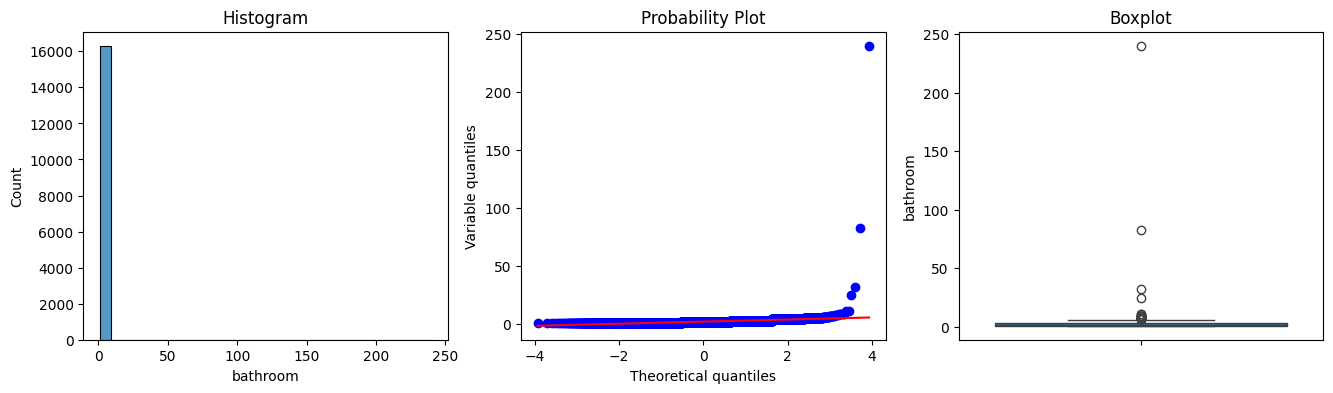

land_area


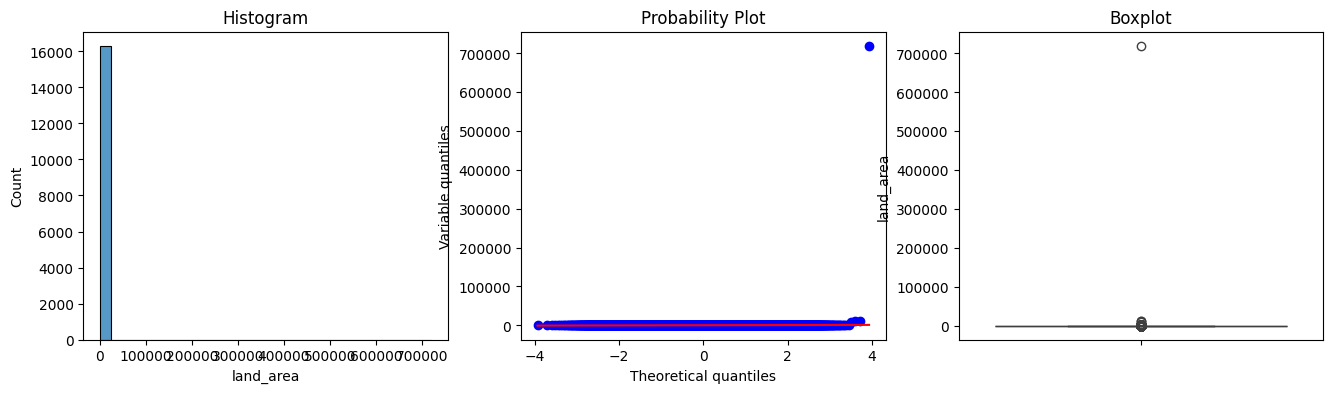

building_area


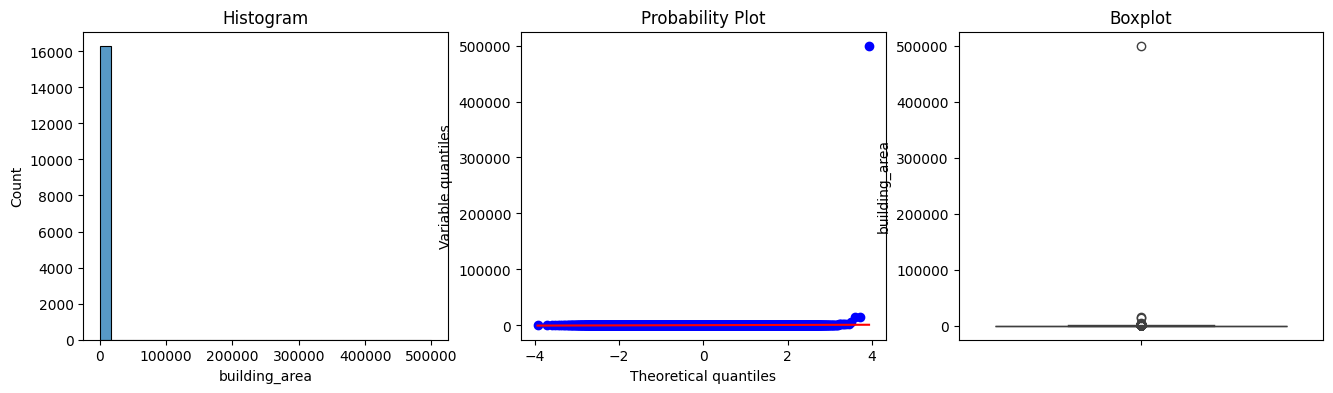

In [335]:
for col in numerical_cols.columns:
    check_plot(rumah123_df, col)

terdapat distribusi miring dan outlier untuk ketiga kolom sehingga perlu dilakukan handling outliers

### Handling Outliers

#### Handling outlier dengan menghapus nilai

In [336]:
def remove_outliers_iqr(df):

    # Pisahkan kolom numerik dan non-numerik
    numerical_df = df.select_dtypes(include=['number'])
    non_numerical_df = df.select_dtypes(exclude=['number'])

    # Hitung IQR hanya pada kolom numerik
    Q1 = numerical_df.quantile(0.25)
    Q3 = numerical_df.quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Mask baris tanpa outlier
    mask = ~((numerical_df < lower_bound) | (numerical_df > upper_bound)).any(axis=1)

    # Gabungkan kembali kolom numerik dan non-numerik
    df_clean = pd.concat([numerical_df[mask], non_numerical_df[mask]], axis=1)

    return df_clean

rumah123_df = remove_outliers_iqr(rumah123_df)


In [337]:
rumah123_df = rumah123_df[rumah123_df['bathroom'] < 5]

karena data yang outlier hanya sedikit maka cukup menghapusnya

price


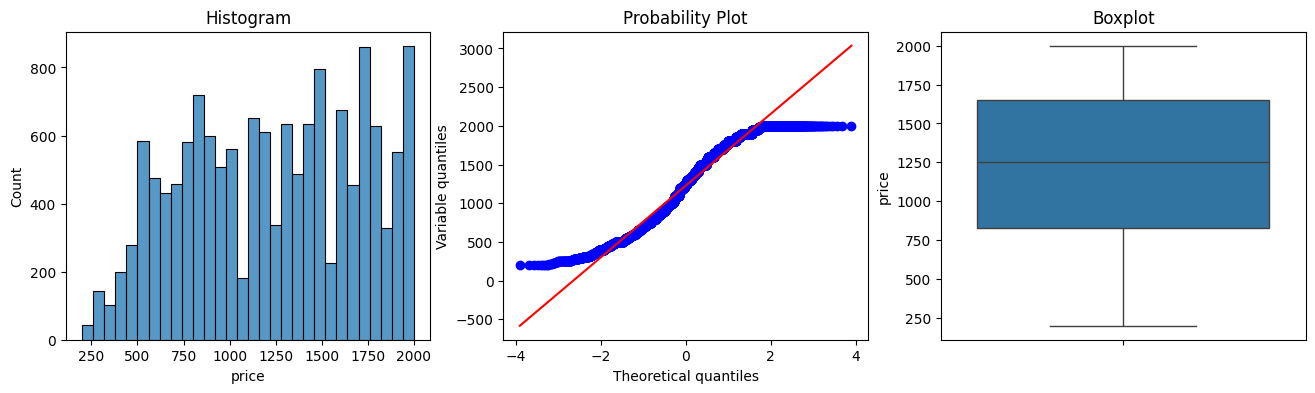

bedroom


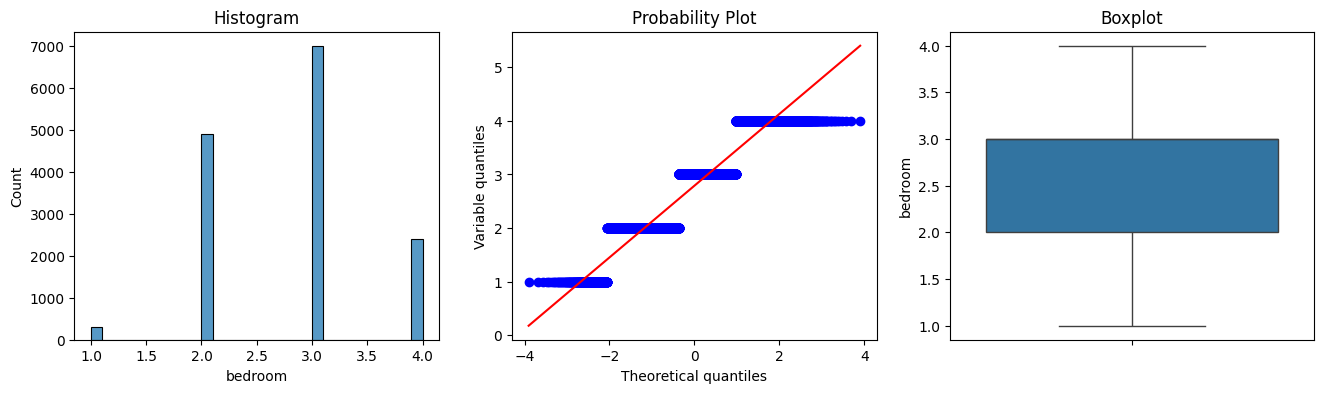

bathroom


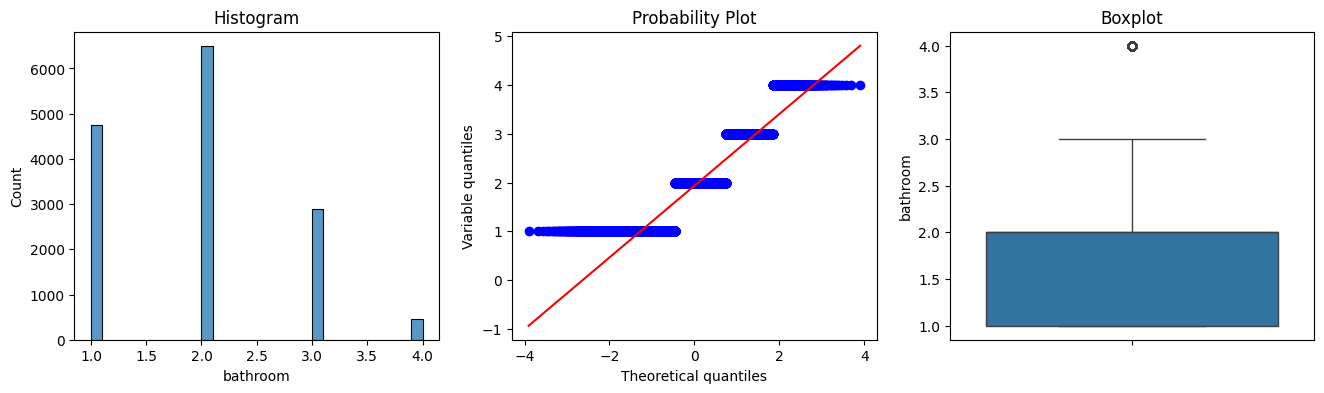

land_area


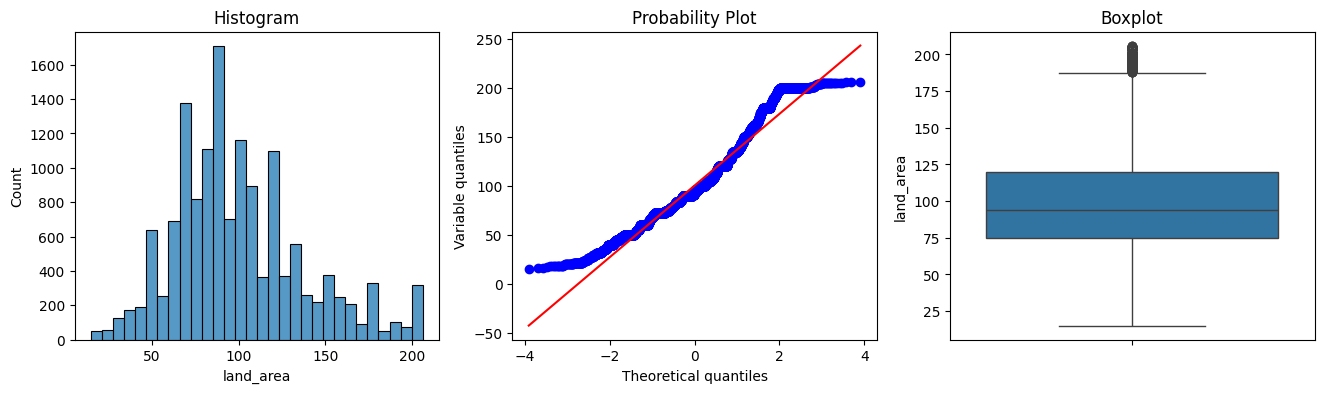

building_area


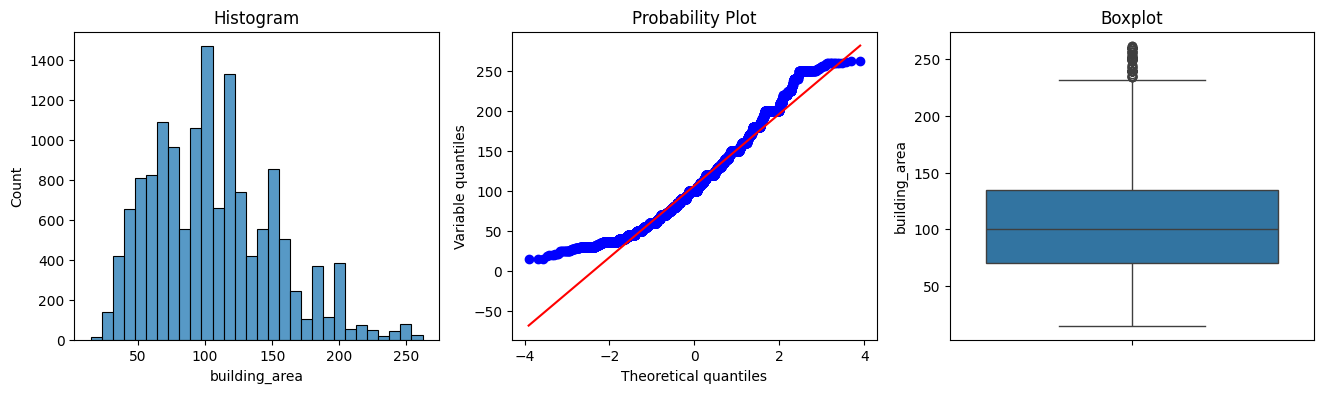

In [338]:

for col in numerical_cols.columns:
    check_plot(rumah123_df, col)

#### Cek Multikolinieritas

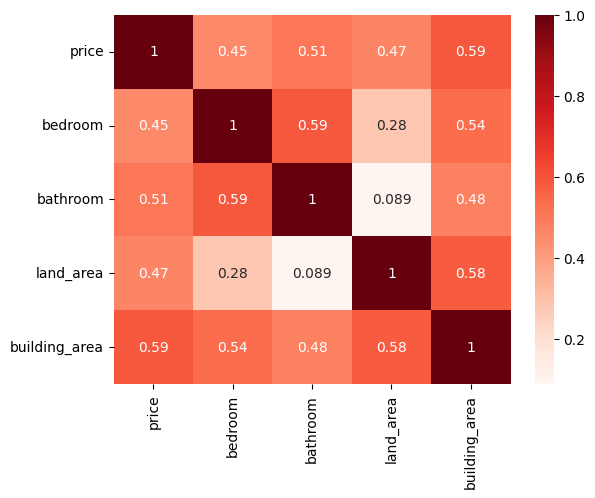

In [339]:
numerical_cols = rumah123_df.select_dtypes(include=['number'])

sns.heatmap(numerical_cols.corr(), annot=True, cmap=plt.cm.Reds)
plt.show()

In [340]:
# Mean encoding pada kolom 'location' terhadap target 'price'
mean_encoded = rumah123_df.groupby('location')['price'].mean()
rumah123_df['location'] = rumah123_df['location'].map(mean_encoded)

In [341]:
rumah123_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14599 entries, 0 to 25930
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          14599 non-null  float64
 1   bedroom        14599 non-null  int64  
 2   bathroom       14599 non-null  int64  
 3   land_area      14599 non-null  int64  
 4   building_area  14599 non-null  int64  
 5   location       14599 non-null  float64
dtypes: float64(2), int64(4)
memory usage: 798.4 KB


In [342]:
rumah123_df.to_csv("../../data/rumah123_ready.csv", index=False)